# Coursework 1: Image filtering

In this coursework you will practice image filtering techniques, which are commonly used to smooth, sharpen or add certain effects to images. 
The coursework includes both coding questions and written questions. Please read both the text and code comment in this notebook to get an idea what you are expected to implement.

## What to do?

* Complete and run the code using `jupyter-lab` or `jupyter-notebook` to get the results.

* Export (File | Export Notebook As...) or print (using the print function of your browser) the notebook as a pdf file, which contains your code, results and text answers, and upload the pdf file onto [Cate](https://cate.doc.ic.ac.uk).

* If Jupyter-lab does not work for you, you can also use Google Colab to write the code and export the pdf file.

## Dependencies:

If you do not have Jupyter-Lab on your laptop, you can find information for installing Jupyter-Lab [here](https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html).

There may be certain Python packages you may want to use for completing the coursework. We have provided examples below for importing libraries. If some packages are missing, you need to install them. In general, new packages (e.g. imageio etc) can be installed by running 

`pip3 install [package_name]`

in the terminal. If you use Anaconda, you can also install new packages by running `conda install [package_name]` or using its graphic user interface.

In [53]:
# Import libaries (provided)
import imageio
import numpy as np
import matplotlib.pyplot as plt
import noise
import scipy
import scipy.signal
import math
import time

## 1. Moving average filter.

Read a specific input image and add noise to the image. Design a moving average filter of kernel size 3x3 and 11x11 respectively. Perform image filtering on the noisy image.

Design the kernel of the filter by yourself. Then perform 2D image filtering using the function `scipy.signal.convolve2d()`.

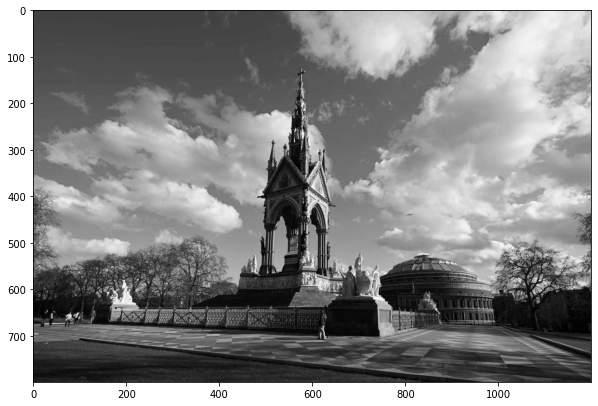

In [54]:
# Read the image (provided)
image = imageio.imread('hyde_park.jpg')
plt.imshow(image, cmap='gray')
plt.gcf().set_size_inches(10, 8)

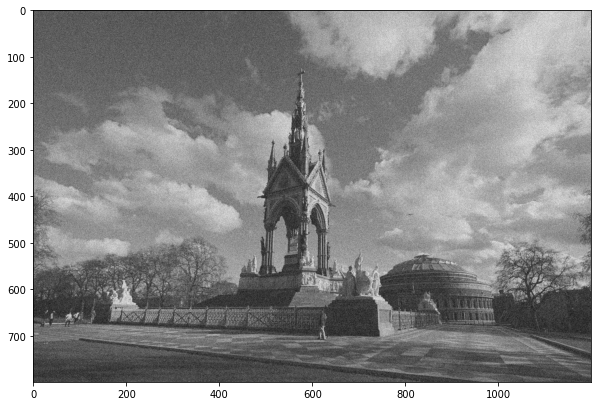

In [55]:
# Corrupt the image with Gaussian noise (provided)
image_noisy = noise.add_noise(image, 'gaussian')
plt.imshow(image_noisy, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 1.1 Filter the noisy image with a 3x3 moving average filter. Show the filtering results. (5 points)

Filter h:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


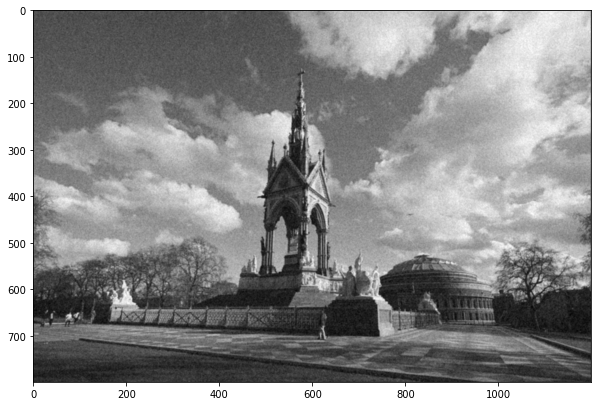

In [56]:
# Design the filter h
k = 3
h = np.full((k,k), 1/k**2)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h, mode='same')

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 1.2 Filter the noisy image with a 11x11 moving average filter. (5 points)

Filter h:
[[0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.008

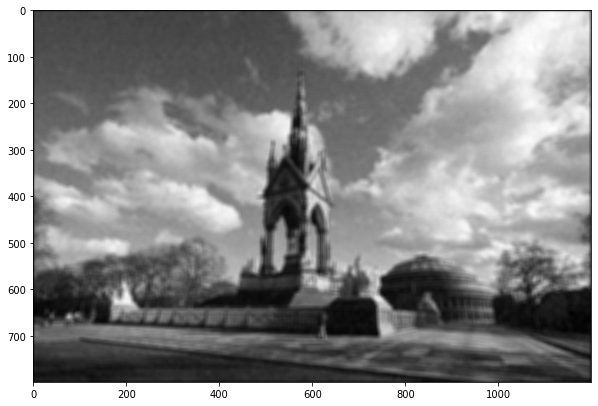

In [57]:
# Design the filter h
k = 11
h = np.full((k,k), 1/k**2)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h, mode='same')

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 1.3 Comment on the filtering results. How do different kernel sizes influence the filtering results? (10 points)

Both *moving average filters* smooth out the image and reduce the noise, leading to a blurred effect in the output images.

**Applying a larger kernel causes the results to appear more blurry** (as we can see above, the 11x11 filter produces a much blurrier image than the 3x3 filter). This is because the larger filter is averaging a larger section of the image, so the intensity of each output pixel is calculated from a larger number of neighbours, so the blur effect is more noticeable compared to a smaller kernel.
Averaging reduces noise because the variance of the noise in the average is smaller than the variance of the pixel noise (for $\mu$ = 0 in Gaussian noise).

## 2. Edge detection.

Perform edge detection using Prewitt filtering, as well as Gaussian + Prewitt filtering.

### 2.1 Implement 3x3 Prewitt filters and convolve with the noisy image. (10 points)

prewitt_x:
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]
prewitt_y:
[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


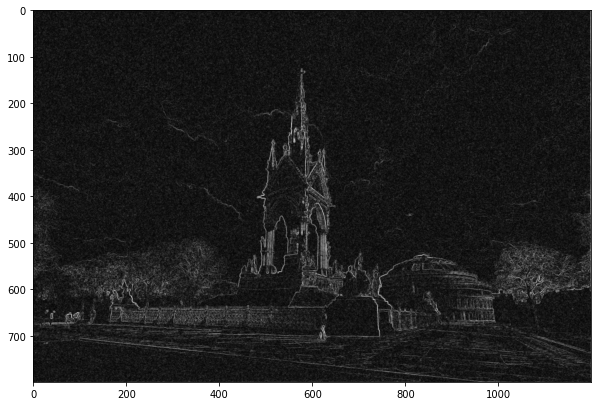

In [58]:
# Design the Prewitt filters 
prewitt_x = np.array([
    [1,0,-1], 
    [1,0,-1], 
    [1,0,-1]
])
prewitt_y = np.array([
    [1,1,1], 
    [0,0,0], 
    [-1,-1,-1]
])

# Prewitt filtering
g_x = scipy.signal.convolve2d(image_noisy, prewitt_x, mode='same')
g_y = scipy.signal.convolve2d(image_noisy, prewitt_y, mode='same')

# Calculate the gradient magnitude
grad_mag = np.sqrt(g_x**2 + g_y**2)

# Print the filters (provided)
print('prewitt_x:')
print(prewitt_x)
print('prewitt_y:')
print(prewitt_y)

# Display the gradient magnitude image (provided)
plt.imshow(grad_mag, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 2.2 Implement a function that generates a 2D Gaussian filter given the parameter $\sigma$. (10 points)

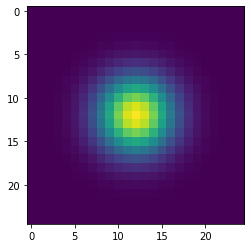

In [59]:
# Design the Gaussian filter
def gaussian_filter_2d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 2D array for the Gaussian kernel

    k = 4       # chosen as heuristic value from slides
    range_size = 2 * k * sigma + 1
    constant = 1.0/(2*np.pi*(sigma**2))

    return np.array([
        [constant * np.exp(-((i - range_size//2)**2 + (j- range_size//2)**2) / (2*(sigma**2))) for i in range(range_size)] 
        for j in range(range_size)
    ])


# Visualise the Gaussian filter when sigma = 3 pixel (provided)
sigma = 3
h = gaussian_filter_2d(sigma)
plt.imshow(h)

### 2.3 Perform Gaussian smoothing ($\sigma$ = 3 pixels), followed by Prewitt filtering, show the gradient magnitude image. (5 points)

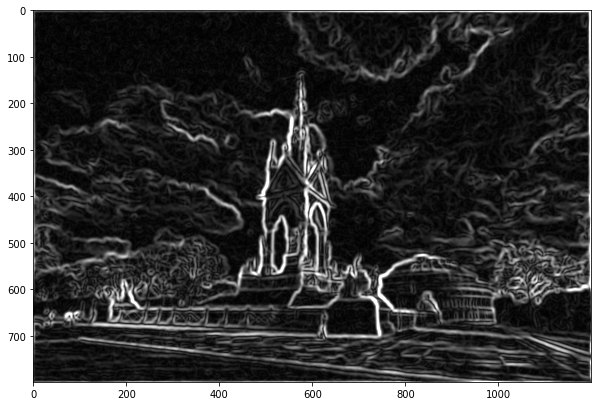

In [60]:
# Perform Gaussian smoothing before Prewitt filtering
smoothed_image = scipy.signal.convolve2d(image_noisy, h, mode='same')

# Prewitt filtering
g_x = scipy.signal.convolve2d(smoothed_image, prewitt_x, mode='same')
g_y = scipy.signal.convolve2d(smoothed_image, prewitt_y, mode='same')

# Calculate the gradient magnitude
grad_mag = np.sqrt(g_x**2 + g_y**2)

# Display the gradient magnitude image (provided)
plt.imshow(grad_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

### 2.4 Perform Gaussian smoothing ($\sigma$ = 7 pixels) and evaluate the computational time for Gaussian smoothing. After that, perform Prewitt filtering. (7 points)

Gaussian smoothing time taken = 5.99s


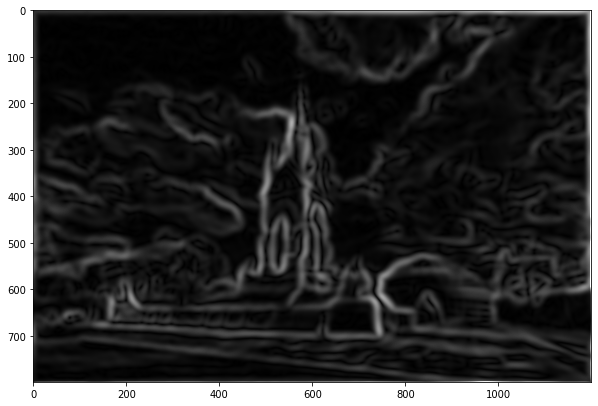

In [46]:
# Construct the Gaussian filter
h = gaussian_filter_2d(sigma=7)

# Perform Gaussian smoothing and count time
start = time.process_time()
smoothed_image = scipy.signal.convolve2d(image_noisy, h, mode='same')
print(f"Gaussian smoothing time taken = {time.process_time() - start:.2f}s")

# Prewitt filtering
g_x = scipy.signal.convolve2d(smoothed_image, prewitt_x, mode='same')
g_y = scipy.signal.convolve2d(smoothed_image, prewitt_y, mode='same')

# Calculate the gradient magnitude
grad_mag = np.sqrt(g_x**2 + g_y**2)

# Display the gradient magnitude image (provided)
plt.imshow(grad_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

### 2.5 Implement a function that generates a 1D Gaussian filter given the parameter $\sigma$. Generate 1D Gaussian filters along x-axis and y-axis respectively. (10 points)

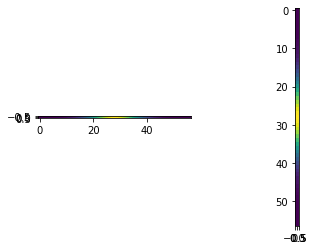

In [47]:
def gaussian_filter_1d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 1D array for the Gaussian kernel

    k = 4       # chosen as heuristic value from slides
    range_size = 2 * k * sigma + 1
    constant = 1.0 / (np.sqrt(2 * np.pi) * sigma)
    h = np.array([
        constant * np.exp(-((i - range_size//2)**2) / (2*(sigma**2))) for i in range(range_size)
    ])
    return h / np.sum(h)

# sigma = 7 pixel (provided)
sigma = 7

# The Gaussian filter along x-axis. Its shape is (1, sz).
filter_1d = gaussian_filter_1d(sigma)
h_x = np.array([filter_1d])

# The Gaussian filter along y-axis. Its shape is (sz, 1).
h_y = np.vstack(filter_1d)

# Visualise the filters (provided)
plt.subplot(1, 2, 1)
plt.imshow(h_x)
plt.subplot(1, 2, 2)
plt.imshow(h_y)

### 2.6 Perform Gaussian smoothing ($\sigma$ = 7 pixels) using two separable filters and evaluate the computational time for separable Gaussian filtering. After that, perform Prewitt filtering, show results and check whether the results are the same as the previous one without separable filtering. (9 points)

Separable gaussian smoothing time taken = 0.53s
Mean difference = 0.0008799575853826435


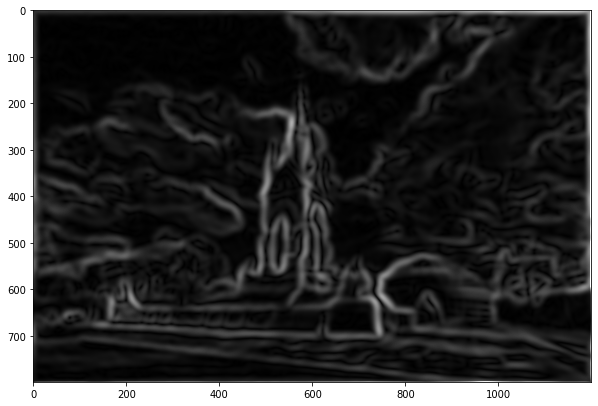

In [48]:
# Perform separable Gaussian smoothing and count time
start = time.process_time()
smoothed_image = scipy.signal.convolve2d(image_noisy, h_x, mode='same')
smoothed_image = scipy.signal.convolve2d(smoothed_image, h_y, mode='same')
print(f"Separable gaussian smoothing time taken = {time.process_time() - start:.2f}s")

# Prewitt filtering
g_x = scipy.signal.convolve2d(smoothed_image, prewitt_x, mode='same')
g_y = scipy.signal.convolve2d(smoothed_image, prewitt_y, mode='same')

# Calculate the gradient magnitude
grad_mag2 = np.sqrt(g_x**2 + g_y**2)

# Display the gradient magnitude image (provided)
plt.figure()
plt.imshow(grad_mag2, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

# Check the difference between the current gradient magnitude map
# and the previous one produced without separable filtering. You
# can report the mean difference between the two.
print(f"Mean difference = {np.average(np.abs(grad_mag2 - grad_mag))}")

### 2.7 Comment on the Gaussian + Prewitt filtering results and the computational time. (9 points)

**Results:**

- The Gaussian filter is used to smoothen out the noisy from the input image. The smoothed output is then convolved with the Prewitt filter which performs edge detection (in the horizontal and vertical directions), i.e.: the intensity of the pixels of "edges" in the image are increased. The final result is a smooth image with high-intensity edges.


- Because the 2D Gaussian filter can be separated into two 1D Gaussian filters and convolution is associative, both results (section 2.4 vs 2.6) are identical in terms of sharpness and brightness. In addition, the reported mean difference between the two methods is negligible (in theory, this should be 0 but in practice, due to floating point errors, there is a very small difference).

**Computational time:**

Performing 2D Gaussian filtering directly took **5.99s** compared to **0.53s** when performing two separate 1D Gaussian filters. This is a **~ x11 speedup** (on my machine), which is a very big performance improvement.


This is because the 2D Gaussian has complexity $O(N^2K^2)$, whereas the separated 1D Gaussians have a complexity of $O(N^2K)$.
  

For $K = 2 \cdot \sigma \cdot k = 2 \cdot 7 \cdot 4 = 56$ for our Gaussian kernel and an image of $799 \cdot 1200 = 958800$ pixels, we have:

- 2D Gaussian: $958800 \cdot 56^2 = 3 \cdot 10^9$ operations (~3 billion ops)
  
- Separate 1D Gaussians: $958800 \cdot 56 = 5.4 \cdot 10^7$ operations (~54 million ops)

## 3. Challenge: Implement a 2D Gaussian filter using Pytorch.

[Pytorch](https://pytorch.org/) is a machine learning framework that supports filtering and convolution.

The [Conv2D](https://pytorch.org/docs/stable/nn.html#conv2d) operator takes an input array of dimension NxC1xXxY, applies the filter and outputs an array of dimension NxC2xXxY. Here, since we only have one image with one colour channel, we will set N=1, C1=1 and C2=1. You can read the documentation of Conv2D for more detail.

In [49]:
# Import libaries (provided)
import torch

### 3.1 Expand the dimension of the noisy image into 1x1xXxY and convert it to a Pytorch tensor. (7 points)

In [50]:
# Expand the dimension of the numpy array
expanded_image = np.expand_dims(image_noisy, axis=(0, 1))

# Convert to a Pytorch tensor using torch.from_numpy
image_noisy_tensor = torch.from_numpy(expanded_image)

### 3.2 Create a Pytorch Conv2D filter, set its kernel to be a 2D Gaussian filter. (7 points)

In [51]:
# A 2D Gaussian filter when sigma = 3 pixel (provided)
sigma = 3
h = gaussian_filter_2d(sigma)
print(h.shape)

# Create the Conv2D filter (provided)
conv = torch.nn.Conv2d(
    in_channels=1,
    out_channels=1,
    kernel_size=h.shape[0],
    padding=1,
    bias=False
)

# Set the kernel weight
weights = torch.from_numpy(np.expand_dims(h, axis=(0,1)))
conv.weight = torch.nn.Parameter(weights, requires_grad=False)

(25, 25)


### 3.3 Apply the filter to the noisy image tensor and display the output image. (6 points)

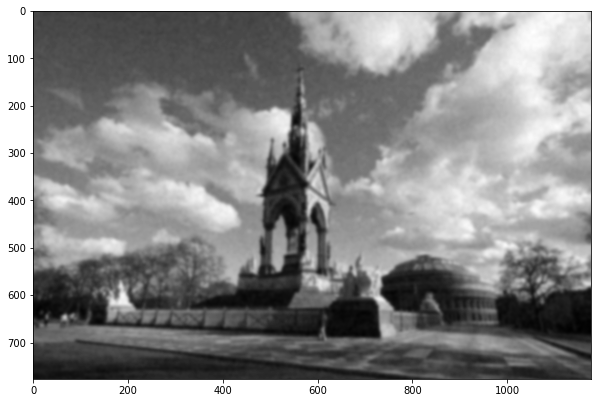

In [52]:
# Filtering
g = conv(image_noisy_tensor).numpy()
image_filtered = g[0][0]

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)

## 4. Survey: How long does it take you to complete the coursework?

Approximately 5 hours (including coding, debugging and reading online documentation)